In [9]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("car_evaluation.csv")   # make sure you have the Car Evaluation dataset

# Example columns: buying, maint, doors, persons, lug_boot, safety, class
print(data.columns)

#  Encode categorical variables (since features are categorical)
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

#  Split into features & target
X = data.drop("class", axis=1)
y = data["class"]
# 4. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#  Build Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred = rf_clf.predict(X_test)

#  Evaluate Model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Car Safety")
plt.show()

#  Feature Importance
importances = rf_clf.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.show()


Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


KeyError: "['class'] not found in axis"

Columns in dataset: ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc
✅ Accuracy: 0.9624277456647399

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        77
           1       0.91      0.67      0.77        15
           2       0.99      1.00      0.99       237
           3       0.79      0.88      0.83        17

    accuracy                           0.96       346
   macro avg       0.91      0.87      0.88       346
weighted avg       0.96      0.96      0.96       346



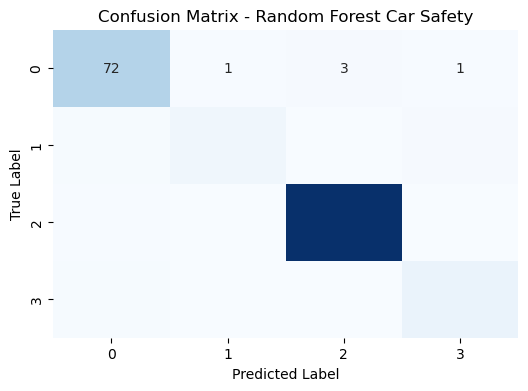

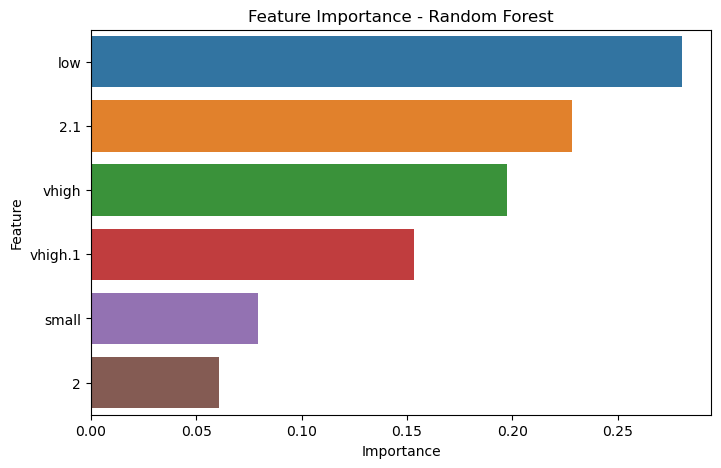

In [11]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load dataset
data = pd.read_csv("car_evaluation.csv")   # Make sure your file name/path is correct
print("Columns in dataset:", data.columns.tolist())
print(data.head())

# 2. Encode categorical variables (all columns are categorical in car dataset)
le = LabelEncoder()
for col in data.columns:
    data[col] = le.fit_transform(data[col])

# 3. Split features & target (last column is the target automatically)
X = data.iloc[:, :-1]   # all columns except last
y = data.iloc[:, -1]    # last column = target (safety class)

# 4. Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Build Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 6. Predictions
y_pred = rf_clf.predict(X_test)

# 7. Evaluate Model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Random Forest Car Safety")
plt.show()

# 9. Feature Importance
importances = rf_clf.feature_importances_
feature_names = X.columns
feat_imp = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp = feat_imp.sort_values("Importance", ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.show()
